# UM Data
## Topic: Heart Disease Prediction
### Team members :-
* Rahman Karimiyazdi (S2108177)
* Hossein Golmohammadi (S2155520)
* Sun Yu (17194849)
* Ee Min Jie (S2104353)
* Qan Khai Mun (S2027890)

## Table of Content
* [Overview and Motivation](#Overview-and-Motivation)
* [Research Question](#Research-Question)
* [Objectives](#Objectives)
* [Related Work](#Related-Work)
* [Data Cleaning](#Data-Cleaning)
    * [Clean Missing Data](#Treating-missing-data)
    * [Imputation of data](#Adding-a-Default-Value-or-a-Filling-a-Missing-Data)
* [Statistical Data Analysis](#Statistical-Data-Analysis)
* [Machine Learning Model](#Machine-Learning)
    * [Data Splitting](#Data-Splitting)
        * [Logistic Regression](#Logistic-Regression)
            * [Prediction Report](#Logistic-regression-prediction-report)
            * [AUC Result](#Area-Under-Curve-score-for-Logistic-Regression)
        * [Decision Tree](#Decision-Tree)
            * [Prediction Report](#Decision-tree-prediction-report)
            * [AUC Result](#Area-under-curve-score-for-Decision-Tree)
* [Reference](#Reference)

## Overview and Motivation

In United States, the number "one" killer in terms of diseases and health-related problems is **coronary heart disease** (CHD). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. This constitutes about 22.18% of the total deaths in the country. Plaque is a waxy substance which will then restrict the flow of blood to the heart muscle causing heart failures and possibly stroke. Other key indicators include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare.   

Due to the danger and lethality of heart disease, determining a strong relation between factors leading to heart failures enables affected patients to receive early treatment which might help save lives and prevent deaths. Computational developments, in turn, allow the application of machine learning methods to detect **patterns** from the data that can predict a patient's condition. In this work, we have used built in data set provided in Kaggle, collected during annual telephone surveys to gather data on the health status of U.S. residents across 50 states, consists of 319,795 rows and 18 columns. The motivation behind this research is to provide a tool for doctors to **predict** heart disease at an early stage using **machine learning algorithms**.

## Research Question

* What are the physiological factors that contribute to the occurrence of heart disease in patients across different age groups?

* Which supervised machine learning model has better accuracy for prediction of heart disease?

## Objectives

* Analyse data set to predict the probability of contracting heart disease using machine learning model based on patient's physiological factors like lifestyles, health and age.

* Provide comparison between the different machine learning models used for prediction in terms of their accuracy and AUC score.

## Related Work

#### Prediction of heart disease using machine learning algorithms by *Misra et al.*
This research paper predicts the probabilities of heart condition and classifies patient's risk level by implementing different data processing techniques like Naive Bayes, Decision Tree, Logistic Regression and Random Forest. Thus, presents a comparative study by analysing the performance of various machine learning algorithms. The trial result verifies that Random Forest algorithm has achieved the highest accuracy of 90.16% compared to other ML algorithms implemented. However, the data set used by the author consist only 303 rows and 13 column attributes which, as highlighted by the author, is insufficient to justify the accuracy of Random Forest algorithm.

   
#### Race and Sex Differences in Modifiable Risk Factors and Incident Heart Failure by *Kubicki et al.*
Kubicki, Xu, Akwo, & Dixon (2020) studied 27,078 black or white participants (mean age: 56 years, 69% black, 63% women) enrolled between 2002 and 2009, without prevalent heart failure. The presence of hypertension, diabetes mellitus, physical underactivity, high body mass index, smoking, high cholesterol, and poor diet was assessed at enrollment. Muenchrath (2012) shows hypertension is a major risk factor for heart disease, stroke, congestive heart failure. 

They found Hypertension and diabetes were associated with greatest heart failure risk, whereas hypertension contributed the greatest population attributable risk, 31.8% (95% confidence interval: 27.3 to 36.0). In black participants, only hypertension and diabetes associated with heart failure risk; in white participants, smoking and high body mass index also associated with heart failure risk. Physical underactivity was a risk factor only in white women. 

#### Census Working Papers by *Flynn et al.*

Flynn, Vaughan, Casper, & Glassman (2021) examine geographic patterns of heart disease death rates and recent changes in death rates for adults aged 35-64 years by level of deprivation as measured by the Multidimensional Deprivation Index (MDI). The relationships between the MDI and heart disease death rates and trends among working age adults shows higher mortality rates among populations with more adverse socioeconomic conditions and suggest greater increases in heart disease death rates in counties with higher deprivation.

#### NAFLD, and cardiovascular and cardiac diseases: Factors influencing risk, prediction and treatment by *Targher et al.*
Targher, Corey, & Byrne (2021) Non-alcoholic fatty liver disease is associated with an increased risk of cardiovascular disease events and other cardiac complications independently of traditional cardiovascular disease risk factors. 


## Data Cleaning
Due to significant amount of missing data values in our data set, our team performed data cleaning on the columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("./heart_Failure_2020.csv",low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319729 non-null  object 
 4   STROKE            319728 non-null  object 
 5   PhysicalHealth    319773 non-null  float64
 6   MentalHealth      319771 non-null  float64
 7   DiffWalking       319774 non-null  object 
 8   S                 319785 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319791 non-null  object 
 12  PhysicalActivity  319794 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            128613 non-null  object 
 16  KidneyDisease     31

In [4]:
df.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000   319773.000000  319771.000000  319795.000000
mean       28.325399        3.371942       3.898659       7.097075
std         6.356100        7.951074       7.955462       1.436007
min        12.020000        0.000000       0.000000       1.000000
25%        24.030000        0.000000       0.000000       6.000000
50%        27.340000        0.000000       0.000000       7.000000
75%        31.420000        2.000000       3.000000       8.000000
max        94.850000       30.000000      30.000000      24.000000

In [5]:
df.shape

(319795, 18)

In [6]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'STROKE',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'S', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


+ Edit the columns name
+ Replace the correct values in 'Sex' column
+ Add a default value for missing data or use mean to fill it
+ Delete the column with missing data
+ Drop the rows where at least one element is missing.


In [7]:
# Corrected Columns Name

df = df.rename(columns = {'S':'Sex', 'STROKE':'Stroke'})
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No             NaN    Yes             NaN   
2                No  26.58     Yes             NaN    NaN            20.0   
3                No  24.21      No             NaN    NaN             NaN   
4                No  23.71      No             NaN     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59         W      Yes   
1                NaN          No       F  80 or older         W       No   
2               30.0          No       M        65-69         W      Yes   
3                0.0          No     NaN        75-79         W      NaN   
4                0.0         Yes  Female        40-44         W      NaN   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No     NaN        35-39  Hispanic       No   
319792           0.0          No     NaN        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good          5    Yes            No        Yes  
1                   Yes  Very good          7     No           NaN        NaN  
2                   Yes       Fair          8    Yes           NaN        NaN  
3                   NaN       Good          6    NaN           NaN        Yes  
4                   Yes  Very good          8    NaN           NaN         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair          6    Yes            No         No  
319791              Yes  Very good          5    Yes            No         No  
319792              Yes       Good          6     No            No         No  
319793               No       Good         12     No            No         No  
319794              Yes       Good          8     No            No         No  

[319795 rows x 18 columns]

In [8]:
# Columns with NaN with True/False

df.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking      True
Stroke               True
PhysicalHealth       True
MentalHealth         True
DiffWalking          True
Sex                  True
AgeCategory         False
Race                False
Diabetic             True
PhysicalActivity     True
GenHealth           False
SleepTime           False
Asthma               True
KidneyDisease        True
SkinCancer           True
dtype: bool

## Treating missing data
### How many missing data points do we have?

In [9]:
#Number of NaN in the columns

df.isnull().sum()

HeartDisease             0
BMI                      0
Smoking                  0
AlcoholDrinking         66
Stroke                  67
PhysicalHealth          22
MentalHealth            24
DiffWalking             21
Sex                     10
AgeCategory              0
Race                     0
Diabetic                 4
PhysicalActivity         1
GenHealth                0
SleepTime                0
Asthma              191182
KidneyDisease          144
SkinCancer              95
dtype: int64

In [10]:
# Total Missing Data

total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()
print('Total Missing: ',total_missing)
print('--------------')

# Missing Data percentage

percent_missing = (total_missing/total_cells)*100
print('Missing Data Perecentage',percent_missing)


Total Missing:  191636
--------------
Missing Data Perecentage 3.329146623444533


# Adding a Default Value or a Filling a Missing Data

In [11]:
# Fill PhysicalHealth with mean

df['PhysicalHealth'] = df.PhysicalHealth.fillna(df['PhysicalHealth'].mean())
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No        3.000000   
1           No  20.34      No             NaN    Yes        3.371942   
2           No  26.58     Yes             NaN    NaN       20.000000   
3           No  24.21      No             NaN    NaN        3.371942   
4           No  23.71      No             NaN     No       28.000000   

   MentalHealth DiffWalking     Sex  AgeCategory Race Diabetic  \
0          30.0          No  Female        55-59    W      Yes   
1           NaN          No       F  80 or older    W       No   
2          30.0          No       M        65-69    W      Yes   
3           0.0          No     NaN        75-79    W      NaN   
4           0.0         Yes  Female        40-44    W      NaN   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good          5    Yes            No        Yes  
1              Yes  Very good          7     No           NaN        NaN  
2              Yes       Fair          8    Yes           NaN        NaN  
3              NaN       Good          6    NaN           NaN        Yes  
4              Yes  Very good          8    NaN           NaN         No

In [12]:
# Fill MentalHealth with '0.0' and also Alchohol with 'No' 

df['MentalHealth'] = df.MentalHealth.fillna(0.0)
df['AlcoholDrinking'] = df.AlcoholDrinking.fillna('No')
df.head(10)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No        3.000000   
1           No  20.34      No              No    Yes        3.371942   
2           No  26.58     Yes              No    NaN       20.000000   
3           No  24.21      No              No    NaN        3.371942   
4           No  23.71      No              No     No       28.000000   
5          Yes  28.87     Yes              No     No        6.000000   
6           No  21.63      No              No    NaN       15.000000   
7           No  31.64     Yes              No    NaN        5.000000   
8           No  26.45      No              No    NaN        3.371942   
9           No  40.69      No              No    NaN        3.371942   

   MentalHealth DiffWalking     Sex  AgeCategory Race  \
0          30.0          No  Female        55-59    W   
1           0.0          No       F  80 or older    W   
2          30.0          No       M        65-69    W   
3           0.0          No     NaN        75-79    W   
4           0.0         Yes  Female        40-44    W   
5           0.0         Yes     NaN        75-79    B   
6           0.0          No  Female        70-74    W   
7           0.0         Yes  Female  80 or older    W   
8           0.0         NaN       F  80 or older    W   
9           0.0         Yes    Male        65-69    W   

                  Diabetic PhysicalActivity  GenHealth  SleepTime Asthma  \
0                      Yes              Yes  Very good          5    Yes   
1                       No              Yes  Very good          7     No   
2                      Yes              Yes       Fair          8    Yes   
3                      NaN              NaN       Good          6    NaN   
4                      NaN              Yes  Very good          8    NaN   
5                      NaN               No       Fair         12     No   
6                      NaN              Yes       Fair          4    Yes   
7                      Yes               No       Good          9    Yes   
8  No, borderline diabetes               No       Fair          5     No   
9                       No              Yes       Good         10     No   

  KidneyDisease SkinCancer  
0            No        Yes  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        Yes  
4           NaN         No  
5           NaN        NaN  
6           NaN        NaN  
7           NaN         No  
8           Yes        NaN  
9           NaN        NaN

In [13]:
#Before droping

df.shape

(319795, 18)

In [14]:
# Drop Asthma Column because of too much Missing Data

df = df.drop(['Asthma'], axis = 1)
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No        3.000000   
1                No  20.34      No              No    Yes        3.371942   
2                No  26.58     Yes              No    NaN       20.000000   
3                No  24.21      No              No    NaN        3.371942   
4                No  23.71      No              No     No       28.000000   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No        7.000000   
319791           No  29.84     Yes              No     No        0.000000   
319792           No  24.24      No              No     No        0.000000   
319793           No  32.81      No              No     No        0.000000   
319794           No  46.56      No              No     No        0.000000   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59         W      Yes   
1                0.0          No       F  80 or older         W       No   
2               30.0          No       M        65-69         W      Yes   
3                0.0          No     NaN        75-79         W      NaN   
4                0.0         Yes  Female        40-44         W      NaN   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No     NaN        35-39  Hispanic       No   
319792           0.0          No     NaN        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime KidneyDisease SkinCancer  
0                   Yes  Very good          5            No        Yes  
1                   Yes  Very good          7           NaN        NaN  
2                   Yes       Fair          8           NaN        NaN  
3                   NaN       Good          6           NaN        Yes  
4                   Yes  Very good          8           NaN         No  
...                 ...        ...        ...           ...        ...  
319790               No       Fair          6            No         No  
319791              Yes  Very good          5            No         No  
319792              Yes       Good          6            No         No  
319793               No       Good         12            No         No  
319794              Yes       Good          8            No         No  

[319795 rows x 17 columns]

In [15]:
# Corrected 'F' to 'Female' and 'M' to 'Male'

df.loc[(df['Sex'] == 'F'),'Sex'] = 'Female'
df.loc[(df['Sex'] == 'M'),'Sex'] = 'Male'
df

# Corrected 'W' to 'White' and 'B' to 'Black'
df.loc[(df['Race'] == 'W','Race')] = 'White'
df.loc[(df['Race'] == 'B'),'Race'] = 'Black'
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No        3.000000   
1                No  20.34      No              No    Yes        3.371942   
2                No  26.58     Yes              No    NaN       20.000000   
3                No  24.21      No              No    NaN        3.371942   
4                No  23.71      No              No     No       28.000000   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No        7.000000   
319791           No  29.84     Yes              No     No        0.000000   
319792           No  24.24      No              No     No        0.000000   
319793           No  32.81      No              No     No        0.000000   
319794           No  46.56      No              No     No        0.000000   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No     NaN        75-79     White      NaN   
4                0.0         Yes  Female        40-44     White      NaN   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No     NaN        35-39  Hispanic       No   
319792           0.0          No     NaN        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime KidneyDisease SkinCancer  
0                   Yes  Very good          5            No        Yes  
1                   Yes  Very good          7           NaN        NaN  
2                   Yes       Fair          8           NaN        NaN  
3                   NaN       Good          6           NaN        Yes  
4                   Yes  Very good          8           NaN         No  
...                 ...        ...        ...           ...        ...  
319790               No       Fair          6            No         No  
319791              Yes  Very good          5            No         No  
319792              Yes       Good          6            No         No  
319793               No       Good         12            No         No  
319794              Yes       Good          8            No         No  

[319795 rows x 17 columns]

In [16]:
# Before droping

df.shape

(319795, 17)

In [17]:
# Drop the rows where at least one element is missing.

df = df.dropna()
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
36               No  24.62      No              No     No             5.0   
37               No  20.43     Yes              No     No             3.0   
38               No  27.37     Yes              No     No             0.0   
39               No  21.93      No              No     No             3.0   
...             ...    ...     ...             ...    ...             ...   
319788           No  23.38      No              No     No             0.0   
319789           No  22.22      No              No     No             0.0   
319790          Yes  27.41     Yes              No     No             7.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
36               0.0          No  Female  80 or older     White       No   
37               3.0          No  Female        65-69     White       No   
38               0.0          No  Female  80 or older     White       No   
39               2.0          No  Female        70-74     Black       No   
...              ...         ...     ...          ...       ...      ...   
319788           0.0          No  Female        60-64  Hispanic       No   
319789           0.0          No  Female        18-24  Hispanic       No   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime KidneyDisease SkinCancer  
0                   Yes  Very good          5            No        Yes  
36                  Yes       Good          6            No         No  
37                  Yes       Fair          5            No        Yes  
38                   No  Very good          8            No         No  
39                  Yes       Fair          4           Yes         No  
...                 ...        ...        ...           ...        ...  
319788              Yes  Excellent          6            No         No  
319789              Yes  Excellent          8            No         No  
319790               No       Fair          6            No         No  
319793               No       Good         12            No         No  
319794              Yes       Good          8            No         No  

[319620 rows x 17 columns]

In [18]:
#After droping
df.shape

(319620, 17)

In [19]:
df.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
KidneyDisease       False
SkinCancer          False
dtype: bool

In [20]:
df.head(10)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0            No  16.60     Yes              No     No             3.0   
36           No  24.62      No              No     No             5.0   
37           No  20.43     Yes              No     No             3.0   
38           No  27.37     Yes              No     No             0.0   
39           No  21.93      No              No     No             3.0   
40           No  22.60     Yes              No    Yes             0.0   
41           No  28.13      No              No     No             0.0   
42          Yes  25.06      No              No     No             0.0   
43          Yes  30.23     Yes              No     No             6.0   
44           No  30.34     Yes              No     No            30.0   

    MentalHealth DiffWalking     Sex  AgeCategory   Race  \
0           30.0          No  Female        55-59  White   
36           0.0          No  Female  80 or older  White   
37           3.0          No  Female        65-69  White   
38           0.0          No  Female  80 or older  White   
39           2.0          No  Female        70-74  Black   
40          10.0          No  Female        55-59  White   
41           0.0          No    Male        60-64  White   
42           0.0         Yes  Female  80 or older  White   
43           2.0         Yes  Female        75-79  White   
44          10.0         Yes    Male        55-59  White   

                   Diabetic PhysicalActivity  GenHealth  SleepTime  \
0                       Yes              Yes  Very good          5   
36                       No              Yes       Good          6   
37                       No              Yes       Fair          5   
38                       No               No  Very good          8   
39                       No              Yes       Fair          4   
40                       No               No  Very good          8   
41                       No              Yes  Excellent          8   
42                      Yes               No       Good          7   
43                      Yes              Yes       Fair          8   
44  No, borderline diabetes               No       Fair          6   

   KidneyDisease SkinCancer  
0             No        Yes  
36            No         No  
37            No        Yes  
38            No         No  
39           Yes         No  
40            No         No  
41            No         No  
42            No        Yes  
43           Yes         No  
44            No         No

# Statistical Data Analysis

                     BMI  PhysicalHealth  MentalHealth  SleepTime
BMI             1.000000        0.109736      0.064179  -0.051751
PhysicalHealth  0.109736        1.000000      0.288017  -0.061435
MentalHealth    0.064179        0.288017      1.000000  -0.119785
SleepTime      -0.051751       -0.061435     -0.119785   1.000000


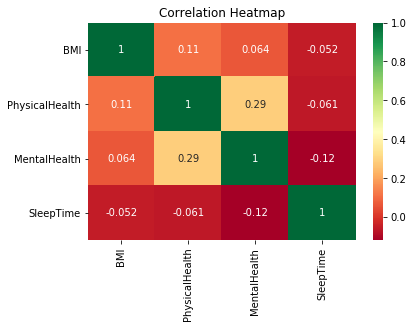

In [21]:
# Statistical Data Analysis
corr = df.corr()
print(corr)
ax =plt.axes()
corr_map = sns.heatmap(corr, cmap="RdYlGn", annot=True, ax=ax)
ax.set_title("Correlation Heatmap")
plt.show()

## Explanation
Based on the above heatmap, it can be seen that the highest positive correlation are between **MentalHealth** vs **PhysicalHealth** (0.29 or 29% correlated) which implies patients with good physical health usually have stronger mental health.

Another correlation, which is a negative correlation (-0.12 or 12% correlated), is **SleepTime** and **MentalHealth** which infer patients who sleeps longer hours will have weaker mental health.

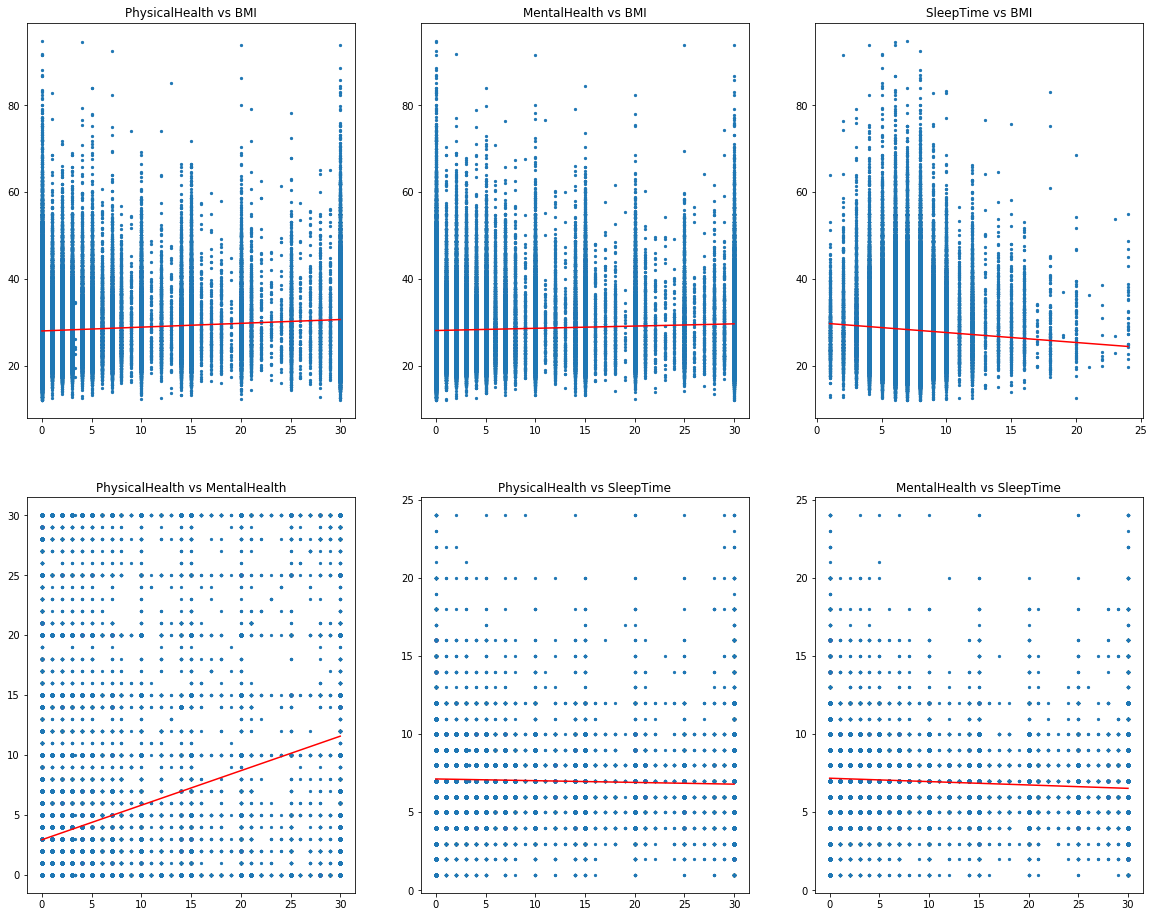

In [22]:
# Plot correlation scatterplot
fig, corrax = plt.subplots(nrows=2,ncols=3,figsize=(20,16))

corrax[0,0].scatter(x='PhysicalHealth',y='BMI',data=df,s=5)
corrax[0,0].plot(np.unique(df['PhysicalHealth']), np.poly1d(np.polyfit(df['PhysicalHealth'],df['BMI'], 1)) (np.unique(df['PhysicalHealth'])), color='red')
corrax[0,0].title.set_text('PhysicalHealth vs BMI')

corrax[0,1].scatter(x='MentalHealth',y='BMI',data=df, s=5)
corrax[0,1].plot(np.unique(df['MentalHealth']), np.poly1d(np.polyfit(df['MentalHealth'],df['BMI'], 1)) (np.unique(df['MentalHealth'])), color='red')
corrax[0,1].title.set_text('MentalHealth vs BMI')

corrax[0,2].scatter(x='SleepTime',y='BMI',data=df, s=5)
corrax[0,2].plot(np.unique(df['SleepTime']), np.poly1d(np.polyfit(df['SleepTime'],df['BMI'], 1)) (np.unique(df['SleepTime'])), color='red')
corrax[0,2].title.set_text('SleepTime vs BMI')

corrax[1,0].scatter(x='PhysicalHealth',y='MentalHealth',data=df, s=5)
corrax[1,0].plot(np.unique(df['PhysicalHealth']), np.poly1d(np.polyfit(df['PhysicalHealth'],df['MentalHealth'], 1)) (np.unique(df['PhysicalHealth'])), color='red')
corrax[1,0].title.set_text('PhysicalHealth vs MentalHealth')

corrax[1,1].scatter(x='PhysicalHealth',y='SleepTime',data=df, s=5)
corrax[1,1].plot(np.unique(df['PhysicalHealth']), np.poly1d(np.polyfit(df['PhysicalHealth'],df['SleepTime'], 1)) (np.unique(df['PhysicalHealth'])), color='red')
corrax[1,1].title.set_text('PhysicalHealth vs SleepTime')

corrax[1,2].scatter(x='MentalHealth',y='SleepTime',data=df, s=5)
corrax[1,2].plot(np.unique(df['MentalHealth']), np.poly1d(np.polyfit(df['MentalHealth'],df['SleepTime'], 1)) (np.unique(df['MentalHealth'])), color='red')
corrax[1,2].title.set_text('MentalHealth vs SleepTime')

## Explanation
The above scatterplot shows the distribution of each numerical variable **PhysicalHealth**, **MentalHealth**, **BMI**, **SleepTime**.
Notable correlation can be seen between **PhysicalHealth** vs **MentalHealth** with a rather steeper gradient or 0.29 correlation but distribution is quite spread out which does not follow a positive strong correlation.

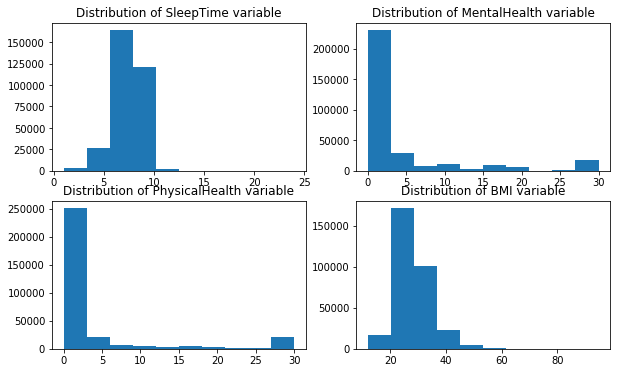

In [23]:
# Analysis on numeric graphs
var = ['SleepTime','MentalHealth','PhysicalHealth','BMI']
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,6))
k=0
for i in range(0,2):
    for j in range(0,2):      
        ax[i][j].hist(df[var[k]])
        ax[i][j].set_title("Distribution of "+ var[k] + " variable")
        k+=1


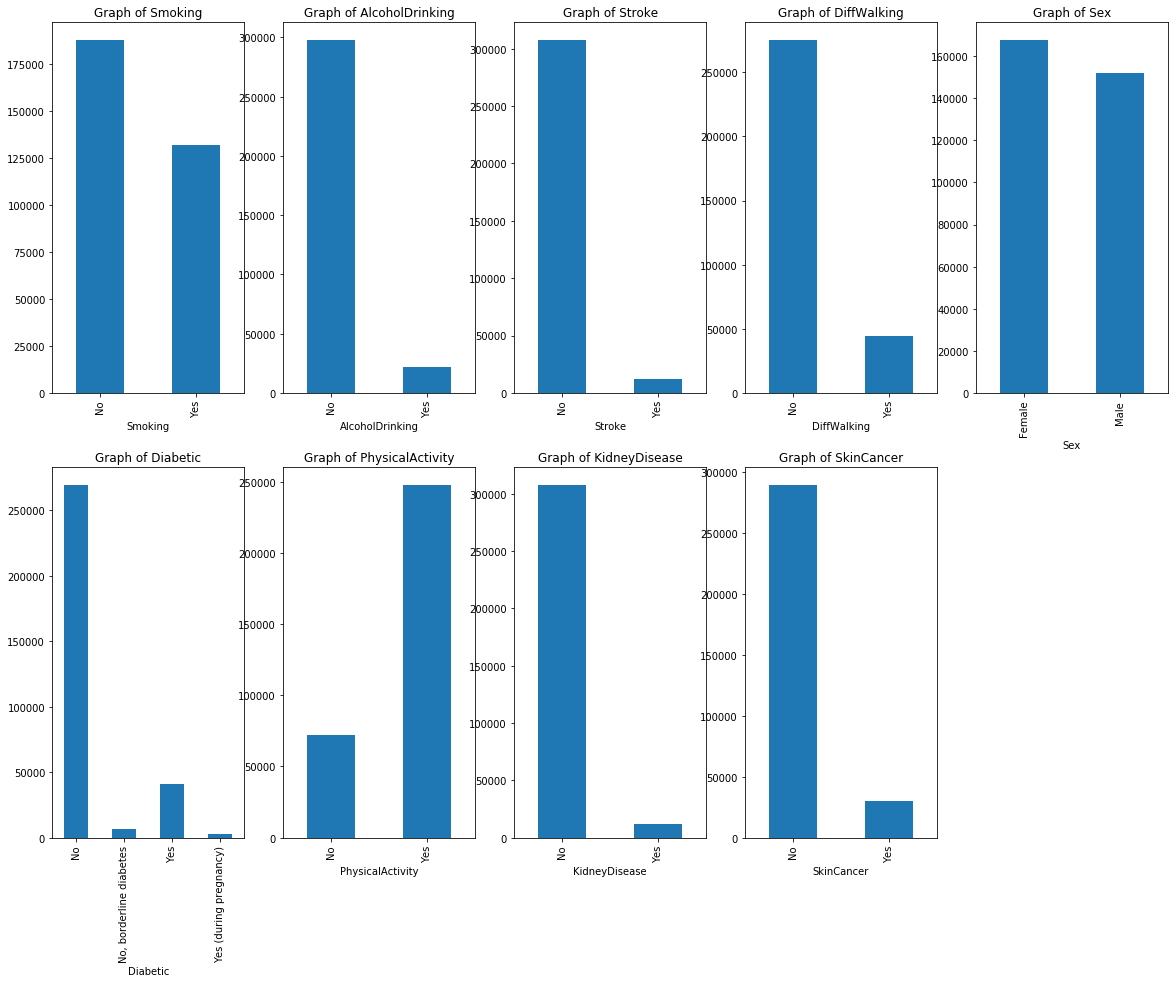

In [58]:
# Distribution of each feature within the dataset (With & without heart disease)

binary_col=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'KidneyDisease', 'SkinCancer']
fig, axx = plt.subplots(nrows=2,ncols=5,figsize=(20,15))
HD_group= df.groupby('HeartDisease').size()

#HD_group.plot(kind='bar')
f=0

for i in range(0,2):
    for j in range(0,5):
        
        if(i== 1 and j==4):
            axx[i,j].remove()
            break
        title = df.groupby(binary_col[f]).size()
        title.plot(kind='bar', ax=axx[i,j], title="Graph of %s"%(binary_col[f]))
        f+=1

    

## Explanation
The above numeric graphs shows the statistics of each numerical variable **SleepTime**,**MentalHealth**,**PhysicalHealth**,**BMI**.
It can be seen that the sleep time of most people basically conforms to the healthy sleep time of 8 hours, and the majority of people in the sample are concentrated at a low level both physically and mentally. For the BMI variable, the number of people at the healthy level was the largest, but there were more overweight people than thin people.

The above bar graphs shows the statistics of each binomial variable (With & without heart disease) **Smoking**,**AlcoholDrinking**,**Stroke**,**DiffWalking**,**Sex**,**Diabetic**,**PhysicalActivity**,**KidneyDisease**,**SkinCancer**.First of all, for all of the variables that represent having a kind of disease the number of people who have a disease is much lower than the number of people who don't.n addition, it can be seen that the gender distribution in the data set is relatively even and the number of smokers is slightly lower than that of non-smokers.

## Patient with heart disease by each feature (Barplot)

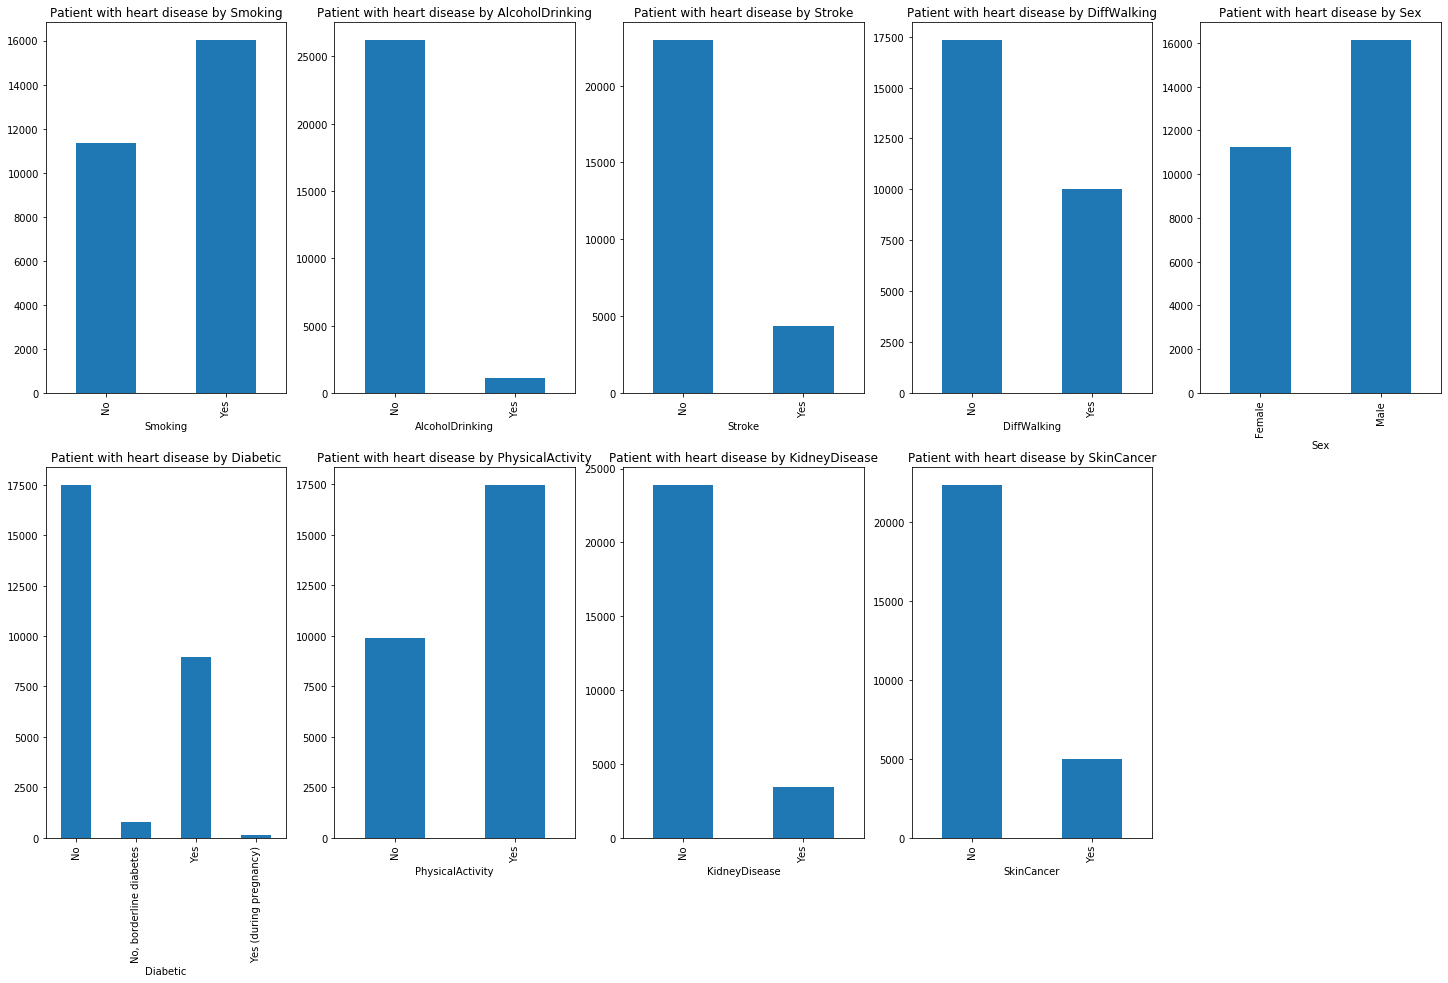

In [60]:
## Patients with heart disease by feature
binary_col=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'KidneyDisease', 'SkinCancer']
fig, axx = plt.subplots(nrows=2,ncols=5,figsize=(25,15))

f= 0
for i in range(0,2):
    for j in range(0,5):
        if(i==1 and j==4):
            axx[i,j].remove()
            break
        HD_group = df.groupby(['HeartDisease',binary_col[f]]).size()
        HD_group['Yes'].plot(kind='bar', ax=axx[i,j], title="Patient with heart disease by %s"%(binary_col[f]))
        f+=1



## Explanation
The above bar graphs shows the statistics of each binomial variable (With heart disease) **Smoking**,**AlcoholDrinking**,**Stroke**,**DiffWalking**,**Sex**,**Diabetic**,**PhysicalActivity**,**KidneyDisease**,**SkinCancer**.By comparing it to the the bar graphs(With & without heart disease),it can be seen that Smokers account for a higher proportion of heart disease patients.As same the male is more than female.For all of the variables that represent having a kind of disease it can seen that Patients with heart disease also have a higher rate of other medical conditions.

## Patient with Gender with Heart Disease

In [26]:
## Heart by GENDER
fig = plt.figure(figsize=(20,15), dpi=1600)

## Heart disease by gender
ax1 = plt.subplot2grid((1,3),(0,0))
heart_by_gender = df.groupby(['HeartDisease','Sex']).size()
heart_by_gender.plot.pie(title="Chart by Gender",label='', autopct='%.0f%%')


#Distribution by gender without heart disease
ax1 = plt.subplot2grid((1,3),(0,1))
heart_by_gender = df.groupby(['HeartDisease','Sex']).size()
heart_by_gender['No'].plot.pie(title="Chart by Gender without Heart Disease",label='', autopct='%.0f%%')

##Distribution by gender with heart disease
ax1 = plt.subplot2grid((1,3),(0,2))
heart_by_gender = df.groupby(['HeartDisease','Sex']).size()
heart_by_gender['Yes'].plot.pie(title="Chart by Gender with Heart Disease", label='', autopct='%.0f%%')

## Explanation
The pie chart above shows the prevalence of heart disease is roughly equal between male and female, with slightly more men having heart disease than women.

# Pie Chart analysis

In [61]:
## Pie chart
fig = plt.figure(figsize=(20,15), dpi=1600)


# BY RACE
ax1 = plt.subplot2grid((1,2),(0,0))
pie_group_race = df.groupby('Race').size()
pie_group_race.plot.pie(title="Chart by Race",label='')

# BY GEN_HEALTH
ax1 = plt.subplot2grid((1,2),(0,1))
pie_group_health = df.groupby('GenHealth').size()
pie_group_health.plot.pie(title="Chart by Health", label='')


## Bar plot for Age, Race and GenHealth category

In [28]:
fig = plt.figure(figsize=(20,15), dpi=1600)

ax1 = plt.subplot2grid((2,2),(0,0))
bar_group = df.groupby('AgeCategory').size()
bar_group.plot.barh(title='Chart by AgeCategory')

ax1 = plt.subplot2grid((2,2),(0,1))
bar_group = df.groupby('Race').size()
bar_group.plot.barh(title='Chart by Race')

ax1 = plt.subplot2grid((2,2),(1,0))
bar_group = df.groupby('GenHealth').size()
bar_group.plot.barh(title='Chart by GenHealth')

## Explanation
The above bar plot and pie chart shows the statistics of each variable **AgeCategory**,**Race**,**GenHealth**
Based on the above graph it can be seen that there was little difference in the number of different Age category, with 65-69 being the largest.This data set has the largest number of white race and far more than any other race.At last u can find that the vast majority of people equals or more than good level in **GenHealth**.

# Machine Learning
This section showcases our machine learning model which includes **Logistic Regression** & **Decision Tree**.

## Data Splitting

Randomly splitting the original dataset into 30% test set and 70% training set using 'train_test_split' function from sklearn library.

In [29]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols = [ 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime'
       , 'KidneyDisease', 'SkinCancer']

# use the above list to select the features from the original DataFrame
X = df[feature_cols]
y= df['HeartDisease'].map({'Yes': 1, 'No': 0})

In [30]:
#ONEHOT Encoding
#One hot encoding can be defined as the essential process of converting the categorical data variables to be provided
#to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a model.

categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'KidneyDisease', 'SkinCancer'] 

#Create new copy of df
df_OH = df

#Perform one-hot
for column in categorical_columns:
    tempdf = pd.get_dummies(X[column], prefix=column)
    df_OH = pd.merge(
        left=X,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    X = X.drop(columns=column)

In [31]:
# Randomly splitting the original dataset into training set and testing set
# The function"train_test_split" from "sklearn.cross_validation" library performs random splitting.
# "test_size=0.3" means that pick 30% of data samples for testing set, and the rest (70%) for training set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 
my_logreg = LogisticRegression(random_state=0)

# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)

#Model Coeficient:
my_logreg.coef_

array([[ 0.01783796,  0.05300219, -0.00868958,  0.0429683 ]])

In [33]:
#Assess predicted vs actual value
y_predict_lr = my_logreg.predict(X_test)

pd.DataFrame(np.c_[y_test,y_predict_lr],columns=['Actual','Predicted']).head(20)

Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0

## Logistic regression prediction report

Test Accuracy score :  91.41 %
Train Accuracy score :  91.45 %
----------------------
Prediction Report
----------------------
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     87647
           1       0.00      0.00      0.00      8239

    accuracy                           0.91     95886
   macro avg       0.46      0.50      0.48     95886
weighted avg       0.84      0.91      0.87     95886



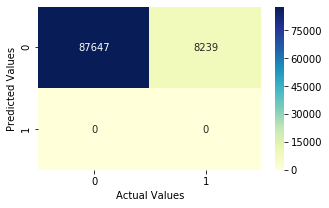

In [34]:
# Generate Prediction Report
print("Test Accuracy score : ",round(my_logreg.score(X_test,y_test)*100,2),"%")
print("Train Accuracy score : ",round(my_logreg.score(X_train,y_train)*100,2),"%")
print("----------------------")
print("Prediction Report")
print("----------------------")
con = confusion_matrix(y_predict_lr,y_test)
plt.figure(figsize=(5,3))
sns.heatmap(con, annot=True,cmap="YlGnBu",fmt='g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
print(classification_report(y_test,y_predict_lr))

## Explanation

Based on the confusion matrix above, it is found that the model is able to detect 87,647 heart disease correctly as **false**, and 8239 as false, though its true. This is partly due to the nature of the dataset, where number of patients with negative heart disease is greater than those of positive. Logistic model could not differentiate between distribution of the 2 positive and negative heart disease patient.

Hence, we can conclude that the **logistic model** is not able to detect positive cases indicates its not suitable to be used as heart disease prediction model though it has high accuracy of **False Negative** but significantly low number of **True Positive**.

## Area Under Curve score for Logistic Regression

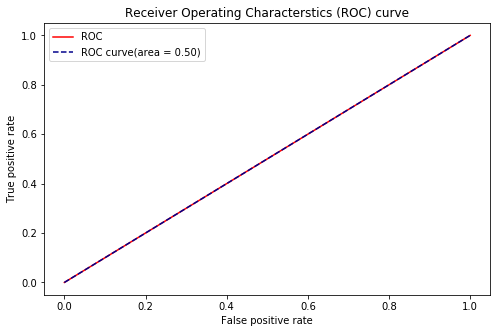

In [35]:
## Plot ROC curve and obtain its area under curve
auc = roc_auc_score(y_test,y_predict_lr)

fpr, tpr, thresholds = roc_curve(y_test,y_predict_lr)
plt.figure(figsize=(8,5))
plt.plot(fpr , tpr , color='red',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characterstics (ROC) curve')
plt.legend()
plt.show()

## Explanation
Based on the ROC graph above, we can conclude that the logistic model is less useful for this data set due to the low ROC value, 0.5. 

## Decision Tree 

In [36]:
from sklearn.tree import DecisionTreeClassifier

# "my_decisiontree" is instantiated as an "object" of DecisionTreeClassifier "class". 
my_decisiontree = DecisionTreeClassifier(random_state=1)

my_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [37]:
# Testing on the testing set:
y_predict_dt = my_decisiontree.predict(X_test)

#Assess predicted vs actual value
pd.DataFrame(np.c_[y_test,y_predict_dt],columns=['Actual','Predicted']).head(20)

Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          1
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0

## Decision tree prediction report

Test Accuracy score :  88.5 %
Train Accuracy score :  95.0 %
----------------------
Classification Report
----------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     87647
           1       0.16      0.08      0.11      8239

    accuracy                           0.88     95886
   macro avg       0.54      0.52      0.52     95886
weighted avg       0.85      0.88      0.87     95886



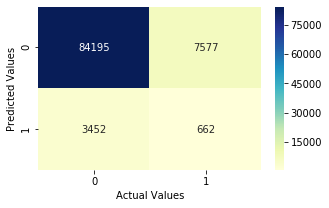

In [38]:
##Print classification report with Confusion Matrix
print("Test Accuracy score : ",round(my_decisiontree.score(X_test,y_test)*100,2),"%")
print("Train Accuracy score : ",round(my_decisiontree.score(X_train,y_train)*100,2),"%")
print("----------------------")
print("Classification Report")
print("----------------------")
con = confusion_matrix(y_predict_dt,y_test)
plt.figure(figsize=(5,3))
sns.heatmap(con, annot=True,cmap="YlGnBu",fmt='g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
print(classification_report(y_test,y_predict_dt))

## Explanation
Based on the confusion matrix as seen above in this section, we found that **Decision Tree** model has lower accuracy (88.5%) compared to 91.0% from **Logistic** model. This model managed to predict correctly a total of 84,195 negative cases and 662 positive cases. Though there are higher number of false positive and true negative with values of 3452 and 7577 respectively, the model seems able to detect positive cases.

The **Decision Tree** model, it is able to detect **True Positive** and **False Negative** in correct proportion to the size of true and negative cases. The model is slightly better to be used as prediction model for this dataset.

## Area under curve score for Decision Tree

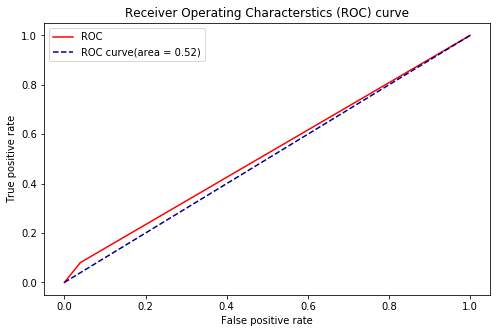

In [39]:
## Plot ROC curve and obtain its area under curve
auc = roc_auc_score(y_test,y_predict_dt)

fpr, tpr, thresholds = roc_curve(y_test,y_predict_dt)
plt.figure(figsize=(8,5))
plt.plot(fpr , tpr , color='red',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characterstics (ROC) curve')
plt.legend()
plt.show()

## Explanation
Based on the ROC curve seen above, we obtain an area of 0.52 which indicates this model perform slightly better compared to logistic regression.

In [40]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
# Function "accuracy_score" from "sklearn.metrics" will perform the element-to-element comparision and returns the 
# portion of correct predictions:

from sklearn.metrics import accuracy_score

score_lr = accuracy_score(y_test, y_predict_lr)
score_dt = accuracy_score(y_test, y_predict_dt)

print("Logistic Regression: ", round(score_lr*100,2))
print("Decision Tree: ", round(score_dt*100,2))

Logistic Regression:  91.41
Decision Tree:  88.5


## Discussion and future improvements
The code above shows the overall accuracy of both models. In the future, we plan to include more machine learning models particularly from the supervised category. This allows us to learn the effects of class imbalances on each model and which model is best chosen to overcome them. Based on this research, our team found that logistic regression is not suitable for data set that has huge class imbalances though it has high accuracy rate.

# Reference

Misra, R., Gupta, P., & Jain, P. (2021, July). Prediction of heart disease using machine learning algorithms. *Prediction of Heart Disease Using Machine Learning Algorithms*. Retrieved May 5, 2022, from https://ijirt.org/master/publishedpaper/IJIRT152152_PAPER.pdf

Rajdhan, A., Agarwal, A., Sai, M., Ravi, D., &amp; Ghuli, D. P. (2020, May 1). Heart disease prediction using machine learning. International Journal of Engineering Research &amp; Technology. Retrieved June 18, 2022, from https://www.ijert.org/heart-disease-prediction-using-machine-learning
